<a href="https://colab.research.google.com/github/razormin/full-stack-deep-learning/blob/main/deep_learning_fundamentals_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Fundamentals - Part 1

## Colab environment

In [1]:
!python --version

Python 3.7.10


In [2]:
!pip list | grep tensor

tensorboard                   2.5.0              
tensorboard-data-server       0.6.1              
tensorboard-plugin-wit        1.8.0              
tensorflow                    2.5.0              
tensorflow-datasets           4.0.1              
tensorflow-estimator          2.5.0              
tensorflow-gcs-config         2.5.0              
tensorflow-hub                0.12.0             
tensorflow-metadata           1.1.0              
tensorflow-probability        0.13.0             


In [3]:
!pip list | grep torch

torch                         1.9.0+cu102        
torchsummary                  1.5.1              
torchtext                     0.10.0             
torchvision                   0.10.0+cu102       


In [4]:
!nvidia-smi

# It's okay to run this notebook without a GPU!

Fri Jul 16 02:12:56 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Basic numerical computing

In [5]:
import numpy as np

# Initialize a numpy ndarray with 3 rows, 2 columns
X = np.zeros((3, 2))
X

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [6]:
# By default, ndarrays are float64
X.shape, X.dtype

((3, 2), dtype('float64'))

In [7]:
# We can set values of a whole row
X[0, :] = 1
X

array([[1., 1.],
       [0., 0.],
       [0., 0.]])

In [8]:
# We can set values of a whole column
X[:, 0] = 2
X

array([[2., 1.],
       [2., 0.],
       [2., 0.]])

In [9]:
X = np.array([
  [1, 2],
  [3, 4],
  [5, 6]
])
X

array([[1, 2],
       [3, 4],
       [5, 6]])

In [10]:
x = np.array([10, 20])
print(x)
print(X.shape, x.shape)

# We can add ndarrays of different dimensions
X + x

[10 20]
(3, 2) (2,)


array([[11, 22],
       [13, 24],
       [15, 26]])

In [11]:
X.shape, x.shape

((3, 2), (2,))

In [12]:
# Element-wise multiplication

X * x

array([[ 10,  40],
       [ 30,  80],
       [ 50, 120]])

In [14]:
# Matrix multiplication
# http://matrixmultiplication.xyz/

x = np.array([[10, 20],]).T
result = X @ x  # alternatively, np.dot(X, x)
result

array([[ 50],
       [110],
       [170]])

### Indexing

In [15]:
X = np.random.rand(3, 2)
X

array([[0.43298788, 0.73834973],
       [0.95826908, 0.1777601 ],
       [0.50845254, 0.20172297]])

In [16]:
X > 0.5

array([[False,  True],
       [ True, False],
       [ True, False]])

In [17]:
X[X > 0.5] = 1
X

array([[0.43298788, 1.        ],
       [1.        , 0.1777601 ],
       [1.        , 0.20172297]])

## Basic plotting

In [18]:
import matplotlib.pyplot as plt
plt.set_cmap('gray')

<Figure size 432x288 with 0 Axes>

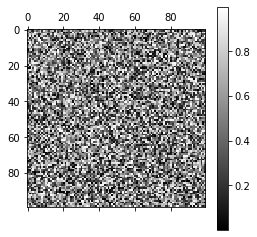

In [19]:
X = np.random.rand(100, 100)
plt.matshow(X)
plt.colorbar()

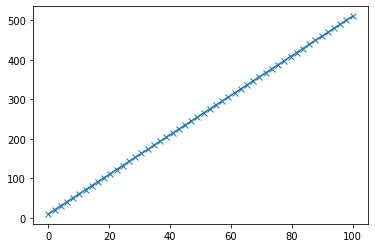

In [20]:
x = np.linspace(0, 100)
y = x * 5 + 10
# y = x * w + b

plt.plot(x, y, 'x-')

## Basic regression with a linear model

x: (50, 1), weights: (1, 1), bias: (1,), y: (50, 1)


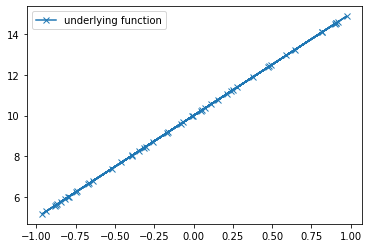

In [21]:
# x is 1-dimensional

n = 50

d = 1
x = np.random.uniform(-1, 1, (n, d))

# y = 5x + 10
weights_true = np.array([[5],])
bias_true = np.array([10])

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plt.plot(x, y_true, marker='x', label='underlying function')
plt.legend()

### Basic prediction function: Linear

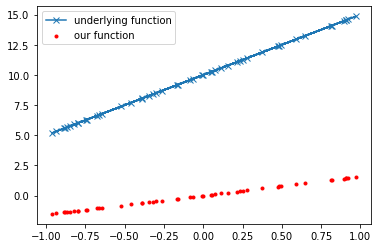

In [22]:
# Let's initialize our predictions

class Linear:
  def __init__(self, input_dim, num_hidden=1):
    # The initialization is important to properly deal with different
    # input sizes (otherwise gradients quickly go to 0).
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    return x @ self.weights + self.bias

linear = Linear(d)
y_pred = linear(x)
plt.plot(x, y_true, marker='x', label='underlying function')
plt.scatter(x, y_pred, color='r', marker='.', label='our function')
plt.legend()

### Basic loss function: MSE


In [23]:
# How wrong are these initial predictions, exactly?
# It's up to us, and our definition is called the loss function.
# Let's use Mean Squared Error (MSE) as our loss function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_true - y_pred) ** 2).mean()
  
loss = MSE()
print(f'Our initial loss is {loss(y_pred, y_true)}')

Our initial loss is 98.71036313037743


### Add back propagation

In [24]:
# Let's use gradient descent to learn the weights and bias that minimizes the loss function.
# For this, we need the gradient of the loss function and the gradients of the linear function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [25]:
# Take one step forward and one step backward to make sure nothing breaks, and that the loss decreases.
loss = MSE()
linear = Linear(d)
y_pred = linear(x)
print(loss(y_pred, y_true))
loss_gradient = loss.backward()
linear.backward(loss_gradient)
linear.update(0.1)
y_pred = linear(x)
print(loss(y_pred, y_true))

98.85658457663469
64.77572559368937


### Train using gradient descent!

Epoch 0, loss 106.3565441041599
Epoch 5, loss 20.017331367009007
Epoch 10, loss 6.411252967218364
Epoch 15, loss 2.768759700100999
Epoch 20, loss 1.3094490230149876
Epoch 25, loss 0.6326982041652227
Epoch 30, loss 0.30715051959874773
Epoch 35, loss 0.14926189835375417


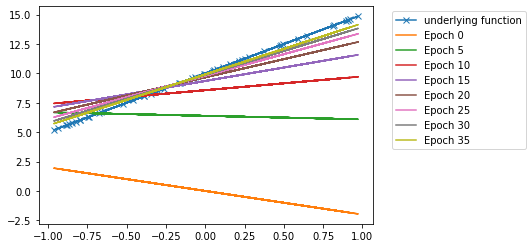

In [26]:
plt.plot(x, y_true, marker='x', label='underlying function')

loss = MSE()
linear = Linear(d)

num_epochs = 40
lr = 0.1

for epoch in range(num_epochs):
  y_pred = linear(x)
  loss_value = loss(y_pred, y_true)

  if epoch % 5 == 0:
    print(f'Epoch {epoch}, loss {loss_value}')
    plt.plot(x, y_pred.squeeze(), label=f'Epoch {epoch}')

  gradient_from_loss = loss.backward()
  linear.backward(gradient_from_loss)
  linear.update(lr)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left");

### 2-dimensional inputs work, too

(100, 2) (2, 1) (1,)
x: (100, 2), weights: (2, 1), bias: (1,), y: (100, 1)


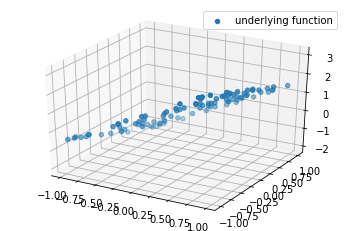

In [27]:
# What about 2-dimensional x?

n = 100
d = 2
x = np.random.uniform(-1, 1, (n, d))

# y = w * x + b
# y = w_0 * x_0 + w_1 * x_1 + b
# y = w@x + b

weights_true = np.array([[2, -1], ]).T
bias_true = np.array([0.5])
print(x.shape, weights_true.shape, bias_true.shape)

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

plot_3d(x, y_true)

3.280313495022


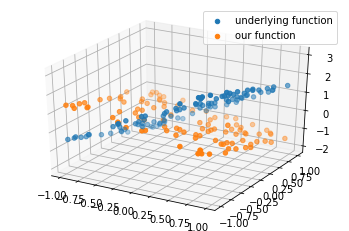

In [28]:
loss = MSE()
linear = Linear(2)
y_pred = linear(x)
print(loss(y_pred, y_true))
fig = plot_3d(x, y_true, y_pred)

Epoch 0, loss 3.280313495022
Epoch 1, loss 2.675495137277675
Epoch 2, loss 2.2047366821120558
Epoch 3, loss 1.8319580230856183
Epoch 4, loss 1.5323048290068368
Epoch 5, loss 1.2883558204069545
Epoch 6, loss 1.0876632210825563
Epoch 7, loss 0.9211494795294922
Epoch 8, loss 0.7820552353969564
Epoch 9, loss 0.6652432436658627
Epoch 10, loss 0.566733061411154
Epoch 11, loss 0.4833860968855668
Epoch 12, loss 0.4126892697929576
Epoch 13, loss 0.35260387261911624
Epoch 14, loss 0.3014579799783318
Epoch 15, loss 0.25786830247631626
Epoch 16, loss 0.22068224025677224
Epoch 17, loss 0.18893402748260296
Epoch 18, loss 0.16181089094870127
Epoch 19, loss 0.13862646904679354


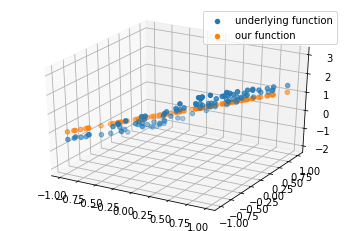

In [29]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=20)
plot_3d(x, y_true, linear(x))

## Basic regression with a Multi-layer Perceptron

So, we now have a way to automatically fit a linear function to N-dimensional data.

How can this be made to work for non-linear data?

x: (200, 2), weights: (2, 1), bias: (1,), y: (200, 1)


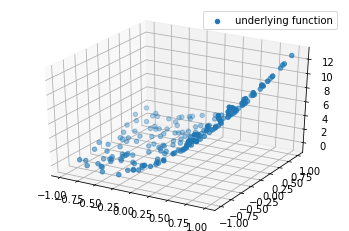

In [30]:
# Make non-linear data

n = 200
d = 2
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[5, 1],]).T
bias_true = np.array([1])

y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plot_3d(x, y_true)

Epoch 0, loss 24.972097438414124
Epoch 1, loss 18.98021512650826
Epoch 2, loss 14.863812152336017
Epoch 3, loss 11.982311453458792
Epoch 4, loss 9.922060515234373
Epoch 5, loss 8.414810157400392
Epoch 6, loss 7.2856316597403
Epoch 7, loss 6.4196214533236
Epoch 8, loss 5.7405987184955976
Epoch 9, loss 5.197460885855437
Epoch 10, loss 4.755430994580896
Epoch 11, loss 4.390431705601341
Epoch 12, loss 4.085459243042612
Epoch 13, loss 3.8282378758680062
Epoch 14, loss 3.6096954541684965
Epoch 15, loss 3.422966368397044
Epoch 16, loss 3.262734157459672
Epoch 17, loss 3.124793573340793
Epoch 18, loss 3.0057550705417206
Epoch 19, loss 2.9028422657879243
Epoch 20, loss 2.813750544959799
Epoch 21, loss 2.736546276667425
Epoch 22, loss 2.6695933200248616
Epoch 23, loss 2.611498152203161
Epoch 24, loss 2.5610679237003104
Epoch 25, loss 2.517277672441429
Epoch 26, loss 2.479244172673968
Epoch 27, loss 2.446204704430663
Epoch 28, loss 2.417499559580471
Epoch 29, loss 2.392557450617899
Epoch 30, loss

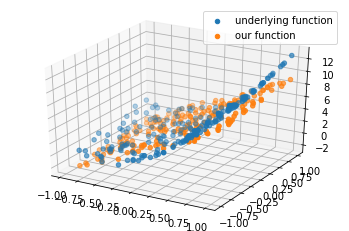

In [31]:
# We can train just fine, but the final loss will remain high, as our linear function is incapable
# of representing the data.

loss = MSE()
linear = Linear(d)
fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, linear(x))

### Add non-linearity: ReLU

In [32]:
# In order to learn non-linear functions, we need non-linearities in our model.

class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient


relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


### Train our new non-linear model

14.954725699314062


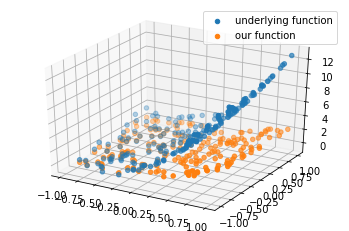

In [33]:
class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu = Relu()
    self.linear2 = Linear(num_hidden, 1)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2
  
  def backward(self, output_gradient):
    linear2_gradient = self.linear2.backward(output_gradient)
    relu_gradient = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_3d(x, y_true, y_pred)

In [34]:
# Test just one forward and backward step
loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

16.929434654049878
8.671802637043518


Epoch 0, loss 8.671802637043518
Epoch 1, loss 6.810485447797057
Epoch 2, loss 4.991576949869244
Epoch 3, loss 3.557926323428545
Epoch 4, loss 2.5538833505303256
Epoch 5, loss 1.871880718731417
Epoch 6, loss 1.4262427945606257
Epoch 7, loss 1.1415675996687653
Epoch 8, loss 0.9571697955565418
Epoch 9, loss 0.8304785913509992
Epoch 10, loss 0.737329274649174
Epoch 11, loss 0.6664481034600752
Epoch 12, loss 0.609628517828512
Epoch 13, loss 0.5627263644959567
Epoch 14, loss 0.5212421279779282
Epoch 15, loss 0.48378406169060784
Epoch 16, loss 0.4499492869742218
Epoch 17, loss 0.41854609738348253
Epoch 18, loss 0.38947195036698834
Epoch 19, loss 0.363493775112785
Epoch 20, loss 0.340063479601355
Epoch 21, loss 0.3187443258669954
Epoch 22, loss 0.2994723469667325
Epoch 23, loss 0.28200555738458083
Epoch 24, loss 0.26615618489086385
Epoch 25, loss 0.2514837056090384
Epoch 26, loss 0.23815777367768423
Epoch 27, loss 0.22609569052224252
Epoch 28, loss 0.21521103691313287
Epoch 29, loss 0.20518039

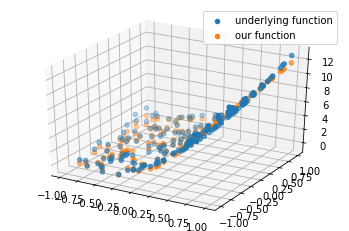

In [35]:
fit(x, y_true, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, model(x))

### Same thing, in PyTorch

In [36]:
import torch
import torch.nn as nn


class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, 1)
  
  def forward(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2


loss = nn.MSELoss()
model = TorchModel(d, 10)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(26.3600, grad_fn=<MseLossBackward>)


In [37]:
# Test just one forward and backward step
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(26.3600, grad_fn=<MseLossBackward>)
tensor(11.8096, grad_fn=<MseLossBackward>)


tensor(11.8096, grad_fn=<MseLossBackward>)
tensor(5.4398, grad_fn=<MseLossBackward>)
tensor(3.5885, grad_fn=<MseLossBackward>)
tensor(2.5807, grad_fn=<MseLossBackward>)
tensor(1.9510, grad_fn=<MseLossBackward>)
tensor(1.5139, grad_fn=<MseLossBackward>)
tensor(1.2157, grad_fn=<MseLossBackward>)
tensor(1.0095, grad_fn=<MseLossBackward>)
tensor(0.8620, grad_fn=<MseLossBackward>)
tensor(0.7551, grad_fn=<MseLossBackward>)
tensor(0.6759, grad_fn=<MseLossBackward>)
tensor(0.6146, grad_fn=<MseLossBackward>)
tensor(0.5639, grad_fn=<MseLossBackward>)
tensor(0.5224, grad_fn=<MseLossBackward>)
tensor(0.4883, grad_fn=<MseLossBackward>)
tensor(0.4595, grad_fn=<MseLossBackward>)
tensor(0.4347, grad_fn=<MseLossBackward>)
tensor(0.4123, grad_fn=<MseLossBackward>)
tensor(0.3918, grad_fn=<MseLossBackward>)
tensor(0.3738, grad_fn=<MseLossBackward>)
tensor(0.3575, grad_fn=<MseLossBackward>)
tensor(0.3421, grad_fn=<MseLossBackward>)
tensor(0.3279, grad_fn=<MseLossBackward>)
tensor(0.3143, grad_fn=<MseLossBa

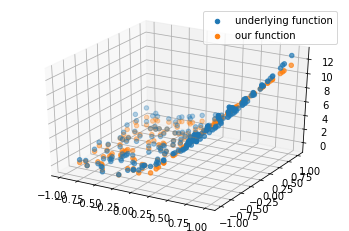

In [38]:
# Now we run the training loop

def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, model(x_tensor).detach())

### Same thing, in Tensorflow/Keras

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
regression (Dense)           (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
7/7 [==============================] - 3s 2ms/step - loss: 12.4340
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 1.2740
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 0.5058
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 0.4237
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 0.2168
Epoc

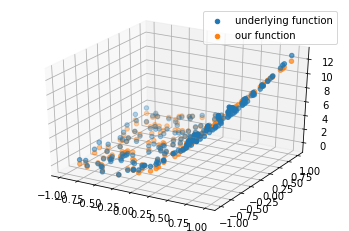

In [39]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

inputs = keras.Input(shape=(2,))
l1 = layers.Dense(10, activation='relu', name='dense_1')(inputs)
outputs = layers.Dense(1, name='regression')(l1)

model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())
model.compile(loss='mse', optimizer=optimizers.SGD(0.1))

model.fit(x, y_true, epochs=10)

y_pred = model.predict(x)

plot_3d(x, y_true, model(x))